In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')



import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score,KFold,GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor 
from sklearn import set_config

In [2]:
calories = pd.read_csv('calories.csv')
exercise = pd.read_csv('exercise.csv')
calories.head(1)

,User_ID,Calories
0,14733363,231.0


In [3]:
exercise.head(1)

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8


In [4]:
data = pd.merge(calories,exercise,on='User_ID')
data.head()

,User_ID,Calories,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,231.0,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,66.0,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,26.0,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,71.0,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,35.0,female,27,154.0,58.0,10.0,81.0,39.8


In [5]:
data.isnull().any()

User_ID       False
Calories      False
Gender        False
Age           False
Height        False
Weight        False
Duration      False
Heart_Rate    False
Body_Temp     False
dtype: bool

In [6]:
data = data.drop_duplicates()
data

,User_ID,Calories,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,231.0,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,66.0,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,26.0,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,71.0,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,35.0,female,27,154.0,58.0,10.0,81.0,39.8
...,...,...,...,...,...,...,...,...,...
14995,15644082,45.0,female,20,193.0,86.0,11.0,92.0,40.4
14996,17212577,23.0,female,27,165.0,65.0,6.0,85.0,39.2
14997,17271188,75.0,female,43,159.0,58.0,16.0,90.0,40.1
14998,18643037,11.0,male,78,193.0,97.0,2.0,84.0,38.3


In [7]:
data['Gender'].replace({'male': 0, 'female': 1}, inplace=True)
data

,User_ID,Calories,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,231.0,0,68,190.0,94.0,29.0,105.0,40.8
1,14861698,66.0,1,20,166.0,60.0,14.0,94.0,40.3
2,11179863,26.0,0,69,179.0,79.0,5.0,88.0,38.7
3,16180408,71.0,1,34,179.0,71.0,13.0,100.0,40.5
4,17771927,35.0,1,27,154.0,58.0,10.0,81.0,39.8
...,...,...,...,...,...,...,...,...,...
14995,15644082,45.0,1,20,193.0,86.0,11.0,92.0,40.4
14996,17212577,23.0,1,27,165.0,65.0,6.0,85.0,39.2
14997,17271188,75.0,1,43,159.0,58.0,16.0,90.0,40.1
14998,18643037,11.0,0,78,193.0,97.0,2.0,84.0,38.3


In [8]:
data_analyst = data.copy()

In [9]:
data = data.drop(columns=['User_ID'], axis=1)
data

,Calories,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,231.0,0,68,190.0,94.0,29.0,105.0,40.8
1,66.0,1,20,166.0,60.0,14.0,94.0,40.3
2,26.0,0,69,179.0,79.0,5.0,88.0,38.7
3,71.0,1,34,179.0,71.0,13.0,100.0,40.5
4,35.0,1,27,154.0,58.0,10.0,81.0,39.8
...,...,...,...,...,...,...,...,...
14995,45.0,1,20,193.0,86.0,11.0,92.0,40.4
14996,23.0,1,27,165.0,65.0,6.0,85.0,39.2
14997,75.0,1,43,159.0,58.0,16.0,90.0,40.1
14998,11.0,0,78,193.0,97.0,2.0,84.0,38.3


In [10]:
X = data.data = data.drop(columns=['Calories'], axis=1)
y = data['Calories']

In [11]:
X.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,0,68,190.0,94.0,29.0,105.0,40.8
1,1,20,166.0,60.0,14.0,94.0,40.3
2,0,69,179.0,79.0,5.0,88.0,38.7
3,1,34,179.0,71.0,13.0,100.0,40.5
4,1,27,154.0,58.0,10.0,81.0,39.8


In [12]:
y.head()

0    231.0
1     66.0
2     26.0
3     71.0
4     35.0
Name: Calories, dtype: float64

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hiển thị kích thước của các tập dữ liệu
print("Size of datasets:")
print("X_train:", X_train.shape)
print("Y_train:", y_train.shape)
print("X_test:", X_test.shape)
print("Y_test:", y_test.shape)

Size of datasets:
X_train: (12000, 7)
Y_train: (12000,)
X_test: (3000, 7)
Y_test: (3000,)


In [14]:
# Display general information about the dataset
print("Dataset information:")
print(data_analyst.info())
print("\n")

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Calories    15000 non-null  float64
 2   Gender      15000 non-null  int64  
 3   Age         15000 non-null  int64  
 4   Height      15000 non-null  float64
 5   Weight      15000 non-null  float64
 6   Duration    15000 non-null  float64
 7   Heart_Rate  15000 non-null  float64
 8   Body_Temp   15000 non-null  float64
dtypes: float64(6), int64(3)
memory usage: 1.0 MB
None




In [15]:
# Display basic statiastics for the columns
print("Basic Statistics for columns:")
print(data_analyst.describe())
print("\n")

Basic Statistics for columns:
            User_ID      Calories        Gender           Age        Height  \
count  1.500000e+04  15000.000000  15000.000000  15000.000000  15000.000000   
mean   1.497736e+07     89.539533      0.503533     42.789800    174.465133   
std    2.872851e+06     62.456978      0.500004     16.980264     14.258114   
min    1.000116e+07      1.000000      0.000000     20.000000    123.000000   
25%    1.247419e+07     35.000000      0.000000     28.000000    164.000000   
50%    1.499728e+07     79.000000      1.000000     39.000000    175.000000   
75%    1.744928e+07    138.000000      1.000000     56.000000    185.000000   
max    1.999965e+07    314.000000      1.000000     79.000000    222.000000   

             Weight      Duration    Heart_Rate     Body_Temp  
count  15000.000000  15000.000000  15000.000000  15000.000000  
mean      74.966867     15.530600     95.518533     40.025453  
std       15.035657      8.319203      9.583328      0.779230  
mi

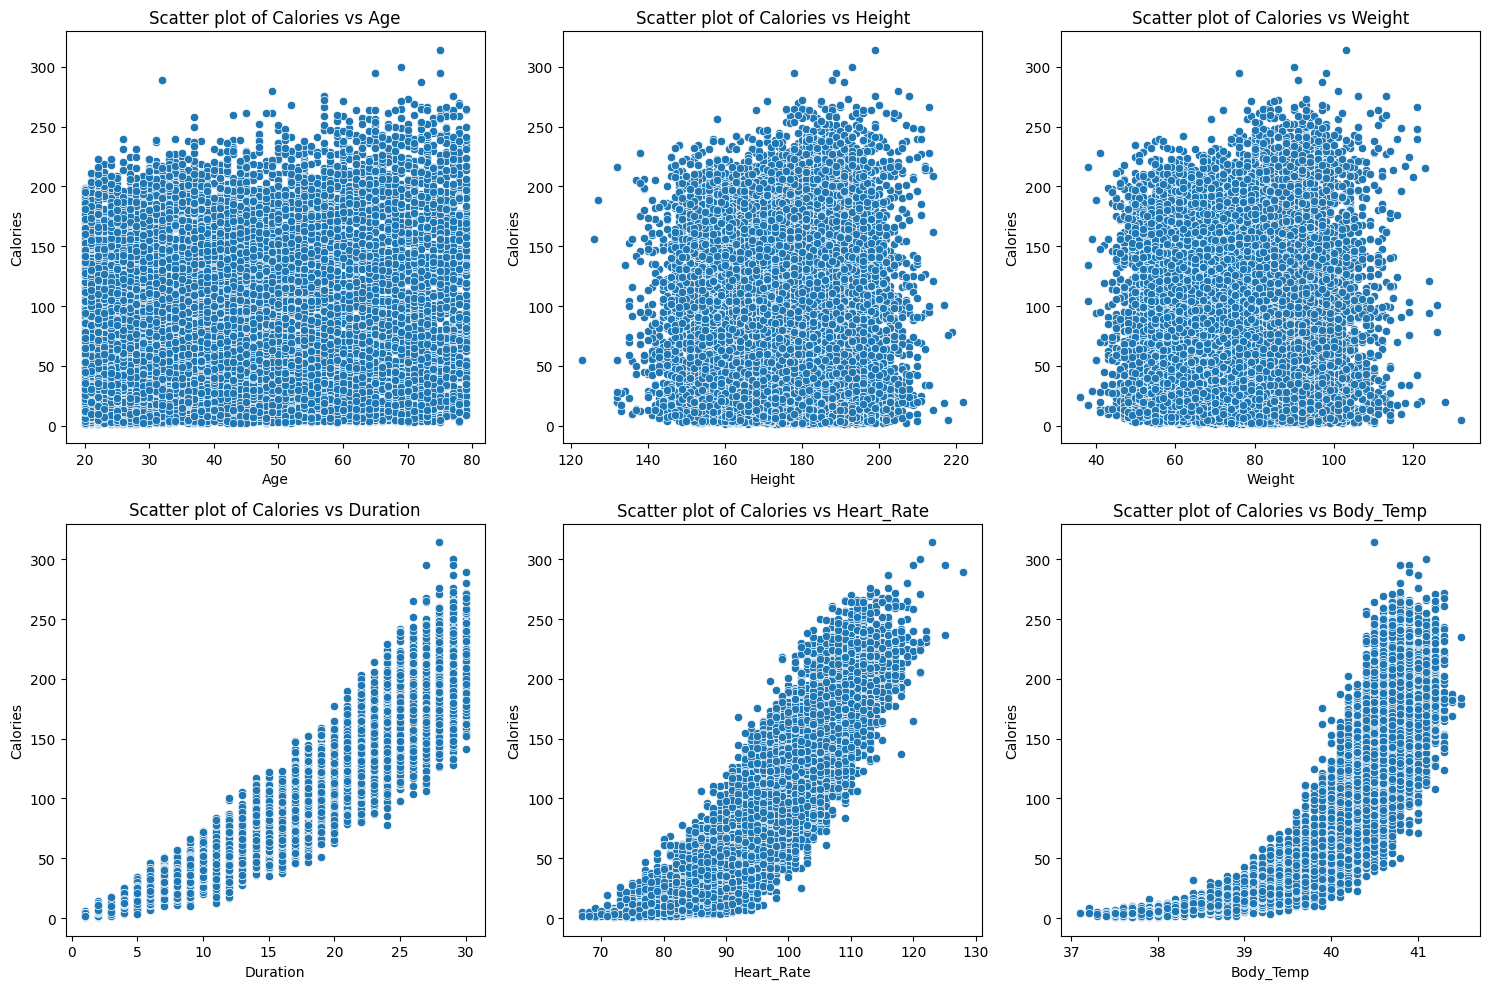

In [16]:
numeric_features = ['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(x=feature, y='Calories', data=data_analyst)
    plt.title(f'Scatter plot of Calories vs {feature}')

plt.tight_layout()
plt.show()

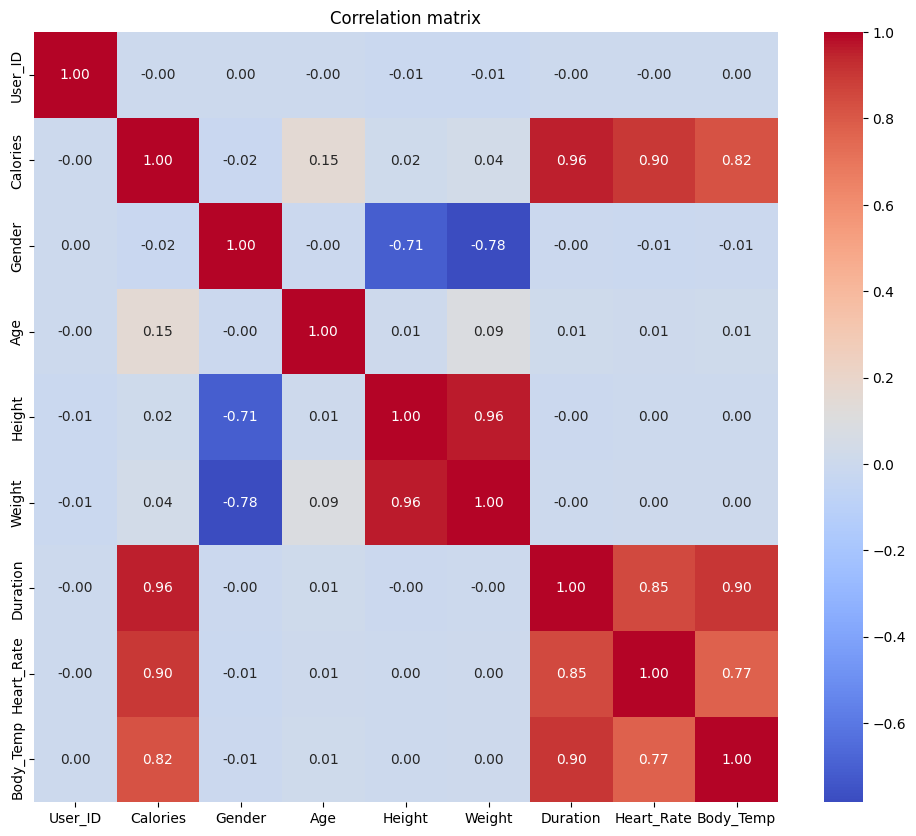

In [17]:
correlation_matrix = data_analyst.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation matrix')
plt.show()

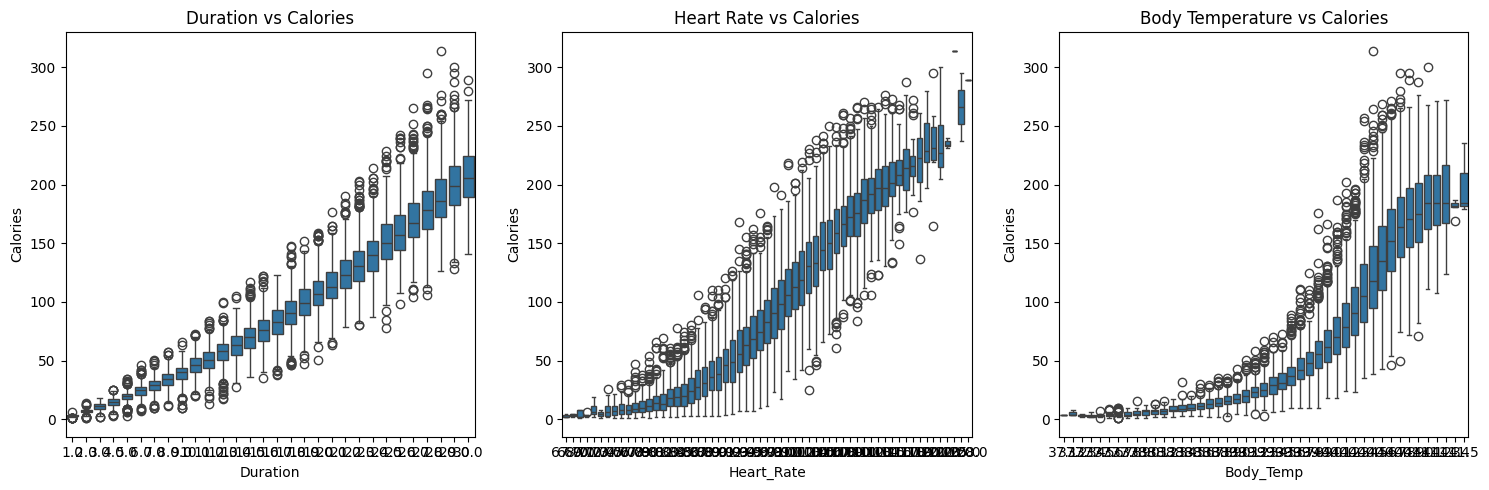

In [18]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x='Duration', y='Calories', data=data_analyst)
plt.title('Duration vs Calories')

plt.subplot(1, 3, 2)
sns.boxplot(x='Heart_Rate', y='Calories', data=data_analyst)
plt.title('Heart Rate vs Calories')

plt.subplot(1, 3, 3)  # Thay đổi số cột thành 4
sns.boxplot(x='Body_Temp', y='Calories', data=data_analyst)
plt.title('Body Temperature vs Calories')

plt.tight_layout()
plt.show()

In [19]:
preprocessor = ColumnTransformer(transformers=[
    ('num',StandardScaler(),['Age','Height','Weight','Duration','Heart_Rate','Body_Temp']),
],remainder='passthrough')

In [20]:
set_config(display='diagram')

In [21]:
# Kiểm tra và xử lý missing value
print(data.isnull().sum())
# Ví dụ: điền giá trị thiếu bằng median
data = data.fillna(data.median(numeric_only=True))

# Kiểm tra unique cho các cột phân loại
for col in data.columns:
    if data[col].dtype == 'object':
        print(col, data[col].unique())

# Kiểm tra outlier bằng IQR cho các cột số
for col in ['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp']:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = data[(data[col] < Q1 - 1.5 * IQR) | (data[col] > Q3 + 1.5 * IQR)]
    print(f"{col} có {outliers.shape[0]} outlier")

# Thống kê median và mode
print("Median:\n", data.median(numeric_only=True))
print("Mode:\n", data.mode().iloc[0])

Calories      0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
dtype: int64
Age có 0 outlier
Height có 14 outlier
Weight có 6 outlier
Duration có 0 outlier
Heart_Rate có 1 outlier
Body_Temp có 369 outlier
Median:
 Calories       79.0
Gender          1.0
Age            39.0
Height        175.0
Weight         74.0
Duration       16.0
Heart_Rate     96.0
Body_Temp      40.2
dtype: float64
Mode:
 Calories        7.0
Gender          1.0
Age            20.0
Height        179.0
Weight         66.0
Duration       26.0
Heart_Rate     91.0
Body_Temp      40.7
Name: 0, dtype: float64


In [39]:
# Kiểm tra xem có dòng nào trùng giữa train và test không
train_index = X_train.index
test_index = X_test.index
overlap = set(train_index).intersection(set(test_index))
print("Số dòng trùng giữa train và test:", len(overlap))

Số dòng trùng giữa train và test: 0


In [22]:
pipeline = Pipeline([("preprocessor",preprocessor),
                     ("model",LinearRegression())])

In [23]:
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['Age', 'Height', 'Weight',
                                                   'Duration', 'Heart_Rate',
                                                   'Body_Temp'])])),
                ('model', LinearRegression())])

In [24]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['Age', 'Height', 'Weight',
                                                   'Duration', 'Heart_Rate',
                                                   'Body_Temp'])])),
                ('model', LinearRegression())])

In [25]:
def model_scorer(model_name, model):
    output = []

    output.append(model_name)

    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

    pipeline.fit(X_train, y_train)

    y_pred = pipeline.predict(X_test)

    # R-squared score
    output.append(r2_score(y_test, y_pred))
    
    # Mean absolute error
    output.append(mean_absolute_error(y_test,y_pred))

    # Cross-validation R-squared score
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)
    cv_results = cross_val_score(pipeline, X, y, cv=kfold, scoring='r2')
    output.append(cv_results.mean())
    
    return output

In [26]:
model_dict = {
    'log': LinearRegression(),
    'RF': RandomForestRegressor(),
    'XGBR': XGBRegressor(),
}

In [27]:
model_output=[]
for model_name,model in model_dict.items():
    model_output.append(model_scorer(model_name,model))

In [28]:
model_output

[['log',
  0.9672937151257295,
  np.float64(8.441513553849699),
  np.float64(0.9671402283675841)],
 ['RF',
  0.9982658681353318,
  np.float64(1.6900666666666666),
  np.float64(0.997925748747997)],
 ['XGBR',
  0.9988680981634738,
  np.float64(1.4984578529596329),
  np.float64(0.9988499611672703)]]

In [29]:
param_grid = {
    'model__n_estimators': [50, 100, 200],
    'model__max_depth': [3, 4, 5],
    'model__learning_rate': [0.01, 0.1, 0.2]
}

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', XGBRegressor())
])

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("R2 score: ", r2_score(y_test, y_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))

Best parameters found:  {'model__learning_rate': 0.1, 'model__max_depth': 5, 'model__n_estimators': 200}
Best cross-validation score:  0.9990977010602972
R2 score:  0.9993140124206046
Mean Absolute Error:  1.18884205515186


In [30]:
sample = pd.DataFrame({
   'Gender':'0',
    'Age':20,
    'Height':177.0,
    'Weight':73.0,
    'Duration':60.0,
    'Heart_Rate':105.0,
    'Body_Temp':37.8,
},index=[0])

In [31]:
predicted_value = best_model.predict(sample)

In [32]:
print("Predicted value:", predicted_value)

Predicted value: [162.68658]


In [33]:
import pickle
from PyQt5 import QtWidgets, QtGui, QtCore

In [34]:
with open('pipeline.pkl', 'wb') as file:
    pickle.dump(best_model, file)

print("Model saved to pipeline.pkl")

Model saved to pipeline.pkl


In [38]:
import os
import pickle
import pandas as pd
from PyQt5 import QtWidgets, QtGui, QtCore

class CaloriePredictorApp(QtWidgets.QWidget):
    def __init__(self):
        super().__init__()
        self.init_ui()
        self.model = self.load_model()

    def load_model(self):
        with open('pipeline.pkl', 'rb') as file:
            model = pickle.load(file)
        return model

    def init_ui(self):
        # Set window properties
        self.setWindowTitle("Calories Burnt Prediction")
        self.setGeometry(100, 100, 300, 400)

        layout = QtWidgets.QVBoxLayout()

        title = QtWidgets.QLabel("Calories Burnt Prediction", self)
        title.setFont(QtGui.QFont('Helvetica', 16))
        title.setAlignment(QtCore.Qt.AlignCenter)
        title.setStyleSheet("background-color: black; color: white;")
        layout.addWidget(title)

        self.gender_label = QtWidgets.QLabel("Select Gender", self)
        self.gender_combo = QtWidgets.QComboBox(self)
        self.gender_combo.addItems(['Male', 'Female'])

        self.age_label = QtWidgets.QLabel("Enter Your Age", self)
        self.age_input = QtWidgets.QLineEdit(self)

        self.height_label = QtWidgets.QLabel("Enter Your Height (cm)", self)
        self.height_input = QtWidgets.QLineEdit(self)

        self.weight_label = QtWidgets.QLabel("Enter Your Weight (kg)", self)
        self.weight_input = QtWidgets.QLineEdit(self)

        self.duration_label = QtWidgets.QLabel("Duration (min)", self)
        self.duration_input = QtWidgets.QLineEdit(self)

        self.heart_rate_label = QtWidgets.QLabel("Heart Rate (bpm)", self)
        self.heart_rate_input = QtWidgets.QLineEdit(self)

        self.body_temp_label = QtWidgets.QLabel("Body Temp (°C)", self)
        self.body_temp_input = QtWidgets.QLineEdit(self)

        layout.addWidget(self.gender_label)
        layout.addWidget(self.gender_combo)
        layout.addWidget(self.age_label)
        layout.addWidget(self.age_input)
        layout.addWidget(self.height_label)
        layout.addWidget(self.height_input)
        layout.addWidget(self.weight_label)
        layout.addWidget(self.weight_input)
        layout.addWidget(self.duration_label)
        layout.addWidget(self.duration_input)
        layout.addWidget(self.heart_rate_label)
        layout.addWidget(self.heart_rate_input)
        layout.addWidget(self.body_temp_label)
        layout.addWidget(self.body_temp_input)

        self.predict_button = QtWidgets.QPushButton("Predict", self)
        self.predict_button.clicked.connect(self.predict_calories_burnt)
        layout.addWidget(self.predict_button)

        self.result_label = QtWidgets.QLabel("", self)
        self.result_label.setFont(QtGui.QFont('Helvetica', 16))
        self.result_label.setAlignment(QtCore.Qt.AlignCenter)
        layout.addWidget(self.result_label)

        self.setLayout(layout)

    def predict_calories_burnt(self):
        gender = self.gender_combo.currentText()
        age = float(self.age_input.text())
        height = float(self.height_input.text())
        weight = float(self.weight_input.text())
        duration = float(self.duration_input.text())
        heart_rate = float(self.heart_rate_input.text())
        body_temp = float(self.body_temp_input.text())

        gender_numeric = 0 if gender == 'male' else 1

        sample_data = pd.DataFrame({
            'Gender': [gender_numeric],
            'Age': [age],
            'Height': [height],
            'Weight': [weight],
            'Duration': [duration],
            'Heart_Rate': [heart_rate],
            'Body_Temp': [body_temp],
        })

        prediction = self.model.predict(sample_data)
        self.result_label.setText(f"Calories Burnt: {prediction[0]:.2f}")

if __name__ == "__main__":
    app = QtWidgets.QApplication([])
    window = CaloriePredictorApp()
    window.show()
    app.exec_()
